# Time Series Analysis 

In [1]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read the dataset 

In [3]:
import pandas as pd 
df = pd.read_csv("AirPassengers.csv", index_col="Month", parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


## Visualize the time series data 

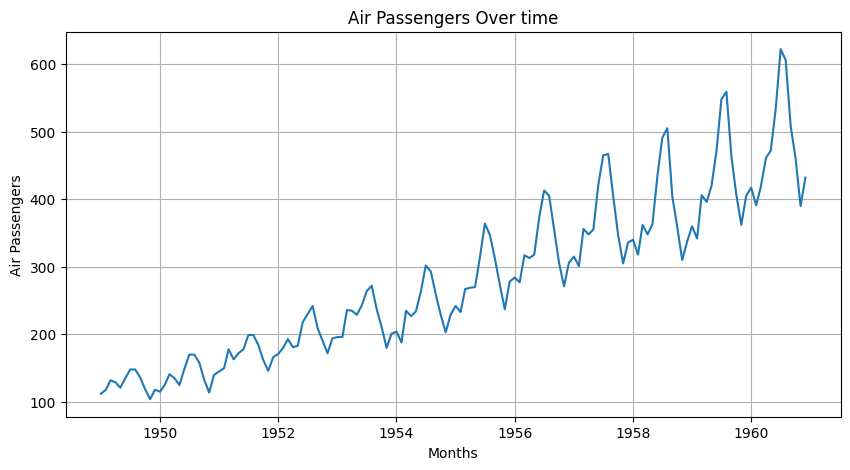

In [6]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,5))
plt.plot(df['Passengers'])
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Air Passengers Over time')
plt.grid()
plt.show()

## Use Multiplicative model for above time series analysis 

### Decomposition 

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(df['Passengers'], model="multiplicative")
Q

In [9]:
Q.observed

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: Passengers, Length: 144, dtype: float64

In [10]:
Q.trend[10:]

Month
1949-11-01    129.000000
1949-12-01    129.750000
1950-01-01    131.250000
1950-02-01    133.083333
1950-03-01    134.916667
                 ...    
1960-08-01           NaN
1960-09-01           NaN
1960-10-01           NaN
1960-11-01           NaN
1960-12-01           NaN
Name: trend, Length: 134, dtype: float64

In [11]:
Q.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [13]:
Q.resid[10:]

Month
1949-11-01    1.006270
1949-12-01    1.011812
1950-01-01    0.962603
1950-02-01    1.071467
1950-03-01    1.037447
                ...   
1960-08-01         NaN
1960-09-01         NaN
1960-10-01         NaN
1960-11-01         NaN
1960-12-01         NaN
Name: resid, Length: 134, dtype: float64

## Trend plot 

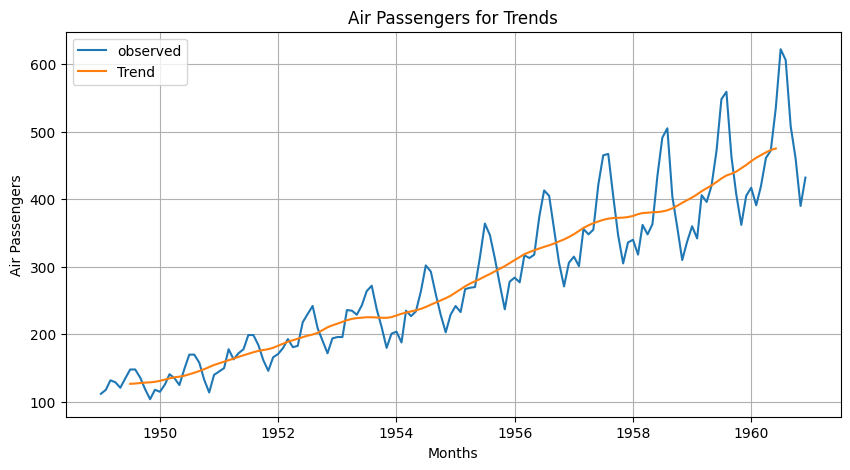

In [16]:
plt.figure(figsize=(10,5))
plt.plot(Q.observed, label = 'observed')
plt.plot(Q.trend, label='Trend')
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Air Passengers for Trends')
plt.legend()
plt.grid()
plt.show()

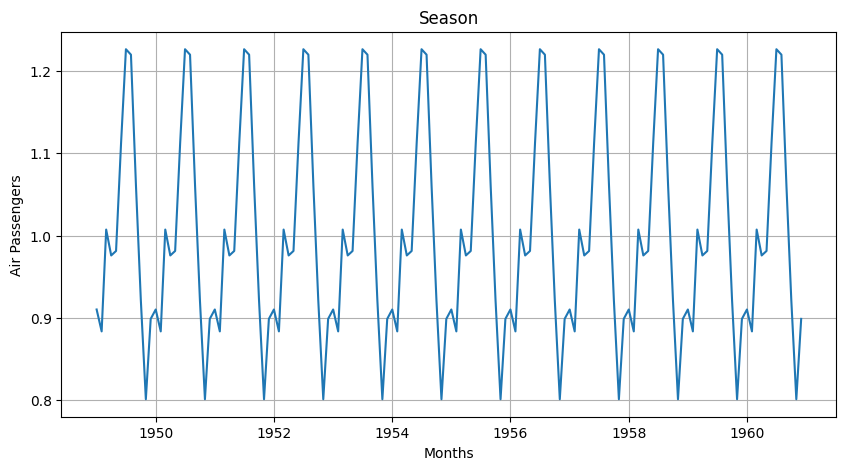

In [17]:
plt.figure(figsize=(10,5))
plt.plot(Q.seasonal)
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Season')
plt.grid()
plt.show()

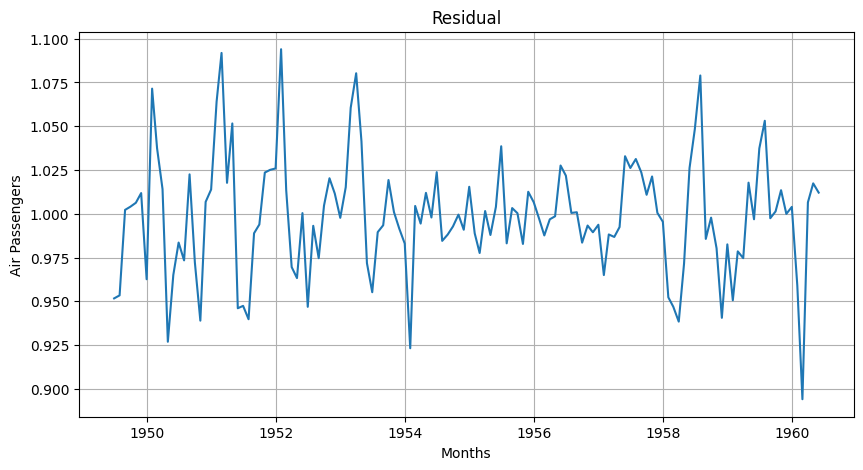

In [18]:
plt.figure(figsize=(10,5))
plt.plot(Q.resid)
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Residual')
plt.grid()
plt.show()

## Forecasting - main goal is to estimate future values with confidence interval 

In [19]:
from pmdarima.arima import auto_arima

In [20]:
model = auto_arima(df['Passengers'], seasonal=True, m=12)

In [21]:
model.order

(2, 1, 1)

## Provide a forecast for 4 years i.e 12*4=48 months 

In [22]:
forecast, conf = model.predict(n_periods=48, return_conf_int=True)

In [23]:
forecast

1961-01-01    445.634907
1961-02-01    420.394941
1961-03-01    449.198223
1961-04-01    491.839805
1961-05-01    503.394289
1961-06-01    566.862216
1961-07-01    654.259897
1961-08-01    638.597165
1961-09-01    540.883378
1961-10-01    494.126219
1961-11-01    423.332272
1961-12-01    465.507106
1962-01-01    479.290360
1962-02-01    454.176267
1962-03-01    483.086352
1962-04-01    525.818556
1962-05-01    537.449932
1962-06-01    600.983103
1962-07-01    688.436142
1962-08-01    672.820382
1962-09-01    575.146451
1962-10-01    528.423109
1962-11-01    457.657856
1962-12-01    499.857038
1963-01-01    513.660950
1963-02-01    488.564385
1963-03-01    517.489343
1963-04-01    560.234167
1963-05-01    571.876251
1963-06-01    635.418507
1963-07-01    722.879255
1963-08-01    707.270036
1963-09-01    609.601655
1963-10-01    562.883023
1963-11-01    492.121765
1963-12-01    534.324337
1964-01-01    548.131126
1964-02-01    523.037003
1964-03-01    551.964032
1964-04-01    594.710612


In [24]:
conf

array([[423.34488175, 467.92493132],
       [394.23564755, 446.55423449],
       [419.83210561, 478.56434119],
       [460.37679543, 523.30281493],
       [470.38111083, 536.40746723],
       [532.70008466, 601.02434829],
       [619.22198815, 689.29780516],
       [602.88077186, 674.31355822],
       [504.63221804, 577.13453782],
       [457.44691132, 530.80552631],
       [386.304856  , 460.35968723],
       [428.19236548, 502.82184749],
       [433.49860983, 525.08211086],
       [405.11018529, 503.24234932],
       [431.15712259, 535.01558207],
       [471.84221029, 579.79490175],
       [481.87539646, 593.0244684 ],
       [544.15854878, 657.80765745],
       [630.61084656, 746.26143765],
       [614.18136046, 731.45940428],
       [515.83468673, 634.45821494],
       [468.54647235, 588.2997459 ],
       [397.29970665, 518.01600525],
       [439.08244597, 560.63162936],
       [446.32982517, 580.9920744 ],
       [418.32113655, 558.80763396],
       [444.62738217, 590.35130424],
 

In [25]:
forecast = forecast.to_frame()
forecast.columns = ['Forecast']
forecast[['Lower Bound', 'Upper Bound']] = conf
forecast.head()

,Forecast,Lower Bound,Upper Bound
1961-01-01,445.634907,423.344882,467.924931
1961-02-01,420.394941,394.235648,446.554234
1961-03-01,449.198223,419.832106,478.564341
1961-04-01,491.839805,460.376795,523.302815
1961-05-01,503.394289,470.381111,536.407467


In [27]:
forecast = forecast.apply(round)
forecast.head()

,Forecast,Lower Bound,Upper Bound
1961-01-01,446.0,423.0,468.0
1961-02-01,420.0,394.0,447.0
1961-03-01,449.0,420.0,479.0
1961-04-01,492.0,460.0,523.0
1961-05-01,503.0,470.0,536.0


In [28]:
forecast.to_csv("Forecast.csv")

## Plotting above results 

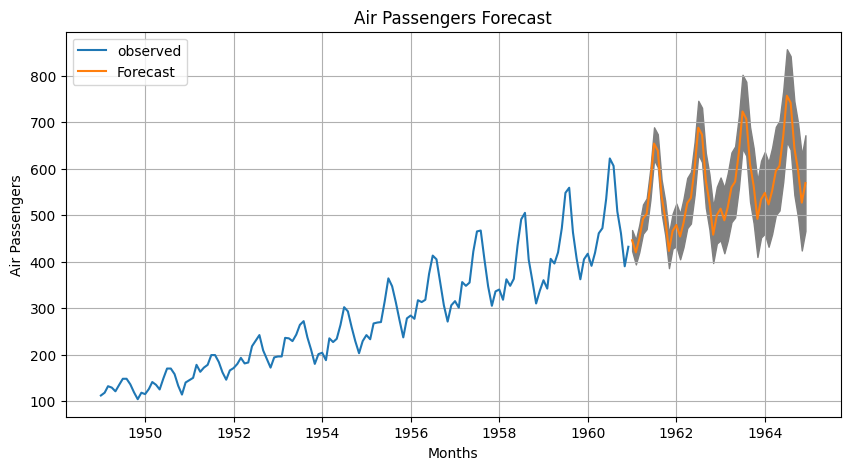

In [33]:
plt.figure(figsize=(10,5))
plt.plot(df["Passengers"], label= 'observed')
plt.plot(forecast["Forecast"], label = 'Forecast')
plt.fill_between(forecast.index, forecast['Lower Bound'], forecast['Upper Bound'], color='gray')
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Air Passengers Forecast')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()